In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sb

In [2]:
# 데이터 불러오기
df = pd.read_csv("../data/고객db_전처리.csv")

In [3]:
# 차량 구매 서비스 플랫폼 -> 회원 정보, 구매 정보 포함
df

,연번,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,아이디,...,최근 구매 시점,최근 구매 요일,마지막 구매 이후 경과 기간,최근 구매 당시 나이,최근 거래 금액,선호 거래 방식,선호 구매 경로,차량 구매 횟수,신차 구매 지수,브랜드 충성도 지수
0,1,강주온,2002-03-04,23,20대 중반,남,010-6502-8753,janisi@himedia.co.kr,법인,14798,...,2분기,평일,350,22,33820000,신용카드,오프라인,1,0.002,0.135
1,2,김경수,1983-01-02,42,40대 초반,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,kyoungsoo031,...,1분기,평일,38,42,89930000,신용카드,오프라인,5,0.508,0.037
2,3,김다은,1999-05-02,26,20대 중반,여,010-6789-0123,kimdaeun26@himedia.co.kr,법인,daeun026,...,1분기,평일,10,26,70990000,계좌이체,오프라인,1,0.161,0.004
3,4,김민수,1960-07-01,65,60대 중반,남,010-1234-5678,kimminsu1@himedia.co.kr,법인,minsu001,...,2분기,평일,689,63,50970000,현금,오프라인,1,0.002,0.130
4,5,김승현,1970-03-02,55,50대 중반,남,010-0123-4567,kimseunghyun20@himedia.co.kr,법인,seunghyun020,...,4분기,주말,536,53,49890000,신용카드,오프라인,1,0.004,0.103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,288,신시우,1958-07-11,67,60대 후반,여,042-207-6955,gyeonghyi78@gmail.com,개인,jihungim,...,4분기,평일,90,66,84310000,신용카드,온라인,2,0.011,0.280
287,289,최춘자,1976-06-27,49,40대 후반,여,031-170-7739,hancunja@yu.kr,개인,jinho50,...,3분기,평일,574,47,35670000,현금,오프라인,3,0.047,0.116
288,290,차서준,1968-01-22,57,50대 후반,여,064-741-3740,qgim@simryujo.com,개인,jihun41,...,1분기,평일,433,56,70990000,계좌이체,온라인,2,0.005,0.304
289,291,안정희,1984-01-10,41,40대 초반,남,051-406-1803,donghyeonbae@joyunson.com,개인,yeongil47,...,1분기,평일,415,40,86540000,현금,온라인,2,0.006,0.268


# 일반 고객에게 재구매 할인 혜택 공지

In [4]:
df.loc[df["고객 등급"] == "일반", ["이름", "휴대폰 번호", "이메일"]]

,이름,휴대폰 번호,이메일
0,강주온,010-6502-8753,janisi@himedia.co.kr
3,김민수,010-1234-5678,kimminsu1@himedia.co.kr
4,김승현,010-0123-4567,kimseunghyun20@himedia.co.kr
5,김영철,010-6789-0123,kimyoungcheol6@himedia.co.kr
6,김윤희,010-2345-6789,leesujin2@himedia.co.kr
...,...,...,...
255,윤병철,042-205-5394,wyu@gmail.com
257,오옥자,032-529-6473,hanyeweon@daum.net
259,허경수,063-010-5636,hayungo@yuhanhoesa.com
271,양은주,053-833-2005,cyun@hanmail.net


# 지금까지 어떻게 팔아왔나?

In [8]:
import plotly.express as px

In [9]:
%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

/var/folders/s_/bq29903x0sdcc_rhgg83v0qw0000gn/T/ipykernel_3779/727121965.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["거주 지역", "연료 구분"])["연번"].count().unstack().reindex(columns=fuel_order).plot(


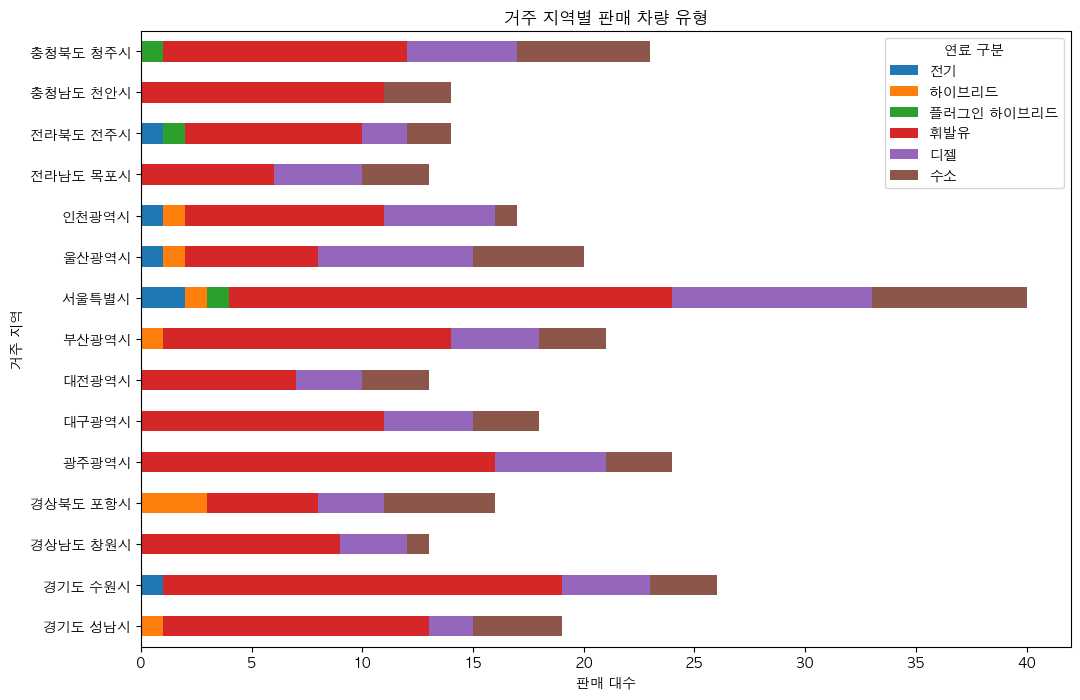

In [10]:
# 연료 구분 정렬 순서 지정
fuel_order = ["전기", "하이브리드", "플러그인 하이브리드", "휘발유", "디젤", "수소"]

# "연료 구분"을 Categorical 타입으로 변경하여 순서 지정
df["연료 구분"] = pd.Categorical(df["연료 구분"], categories=fuel_order, ordered=True)

# 그룹바이 후 연료 구분 순서대로 정렬하여 시각화
df.groupby(["거주 지역", "연료 구분"])["연번"].count().unstack().reindex(columns=fuel_order).plot(
    kind="barh", stacked=True, figsize=(12, 8)
)

plt.title("거주 지역별 판매 차량 유형")
plt.xlabel("판매 대수")
plt.ylabel("거주 지역")
plt.show()

In [36]:
# 차량 구매 건수
# 서울, 수원, 광주, 청주, 울산 등이 높은 편
# 이유 : 인구 밀도가 높은 지역이기 때문

# 전기차 및 하이브리드 차량 구매 건수 : 전반적으로 높지 않음
# 서울, 포항, 울산 등이 그나마 많은 편

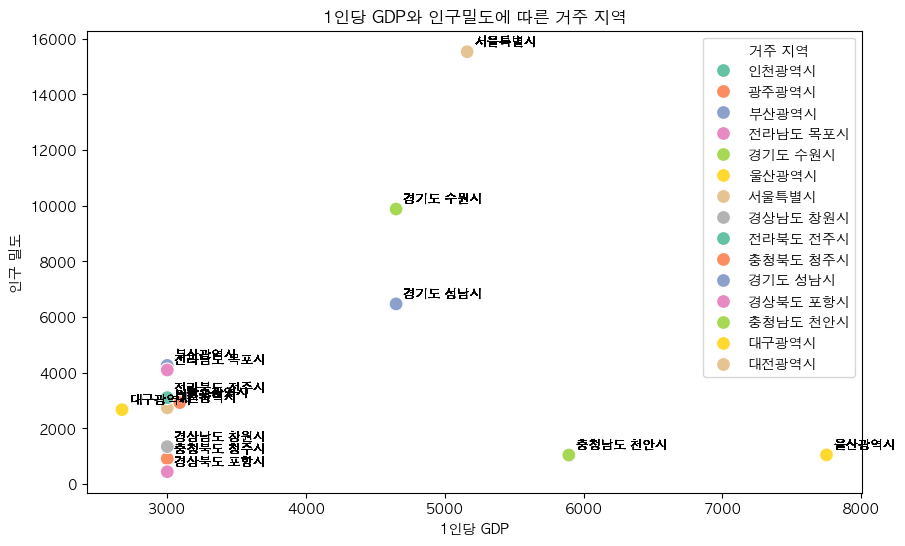

In [39]:
# 스캐터 플롯 생성
plt.figure(figsize=(10, 6))
sb.scatterplot(data=df, x="1인당 GDP (만 원)", y="인구 밀도", hue="거주 지역", palette="Set2", s=100)

# 각 점 옆에 해당 거주 지역 표시
for i in range(len(df)):
    plt.annotate(df["거주 지역"][i], (df["1인당 GDP (만 원)"][i], df["인구 밀도"][i]), 
                 textcoords="offset points", xytext=(5,5), ha='left', fontsize=9)

plt.title("1인당 GDP와 인구밀도에 따른 거주 지역")
plt.xlabel("1인당 GDP")
plt.ylabel("인구 밀도")
plt.show()

In [ ]:
# 중요 타겟팅 할 만한 지역
# 1인당 GDP가 높거나 인구 밀도가 높은 지역 : 서울, 수원, 울산, 성남, 천안

In [71]:
age_order = ["20대 초반", "20대 중반", "20대 후반", "30대 초반", "30대 중반", "30대 후반", "40대 초반", "40대 중반", "40대 후반",
             "50대 초반", "50대 중반", "50대 후반", "60대 초반", "60대 중반", "60대 후반", "70대 초반"]

df["연령대"] = pd.Categorical(df["연령대"], categories=age_order, ordered=True)

/var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/ipykernel_8079/2672227457.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_counts = seoul.groupby("연령대")["차량 사이즈"].value_counts().unstack()
/var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/ipykernel_8079/2672227457.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  type_counts = seoul.groupby("연령대")["차량 유형"].value_counts().unstack()


<Figure size 1000x500 with 0 Axes>

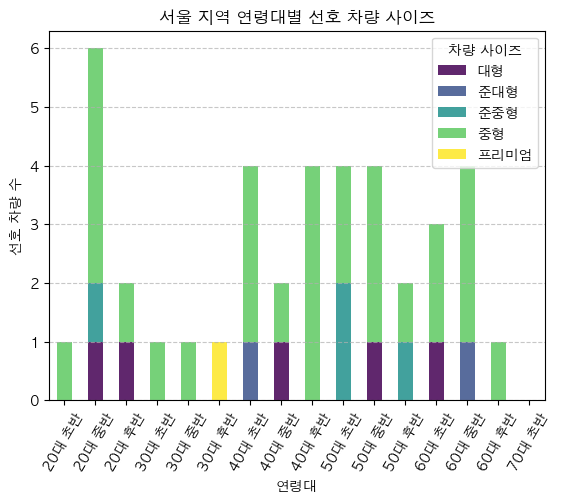

<Figure size 1000x500 with 0 Axes>

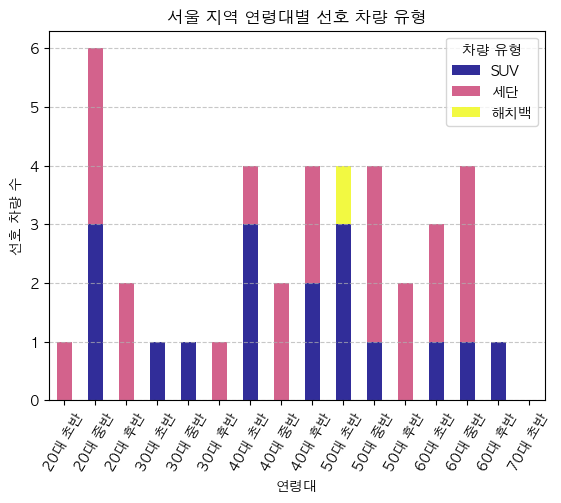

In [72]:
# 서울의 나이대에 따른 선호 차량 사이즈 및 유형
# 서울 지역만 추출
seoul = df.loc[df["거주 지역"] == "서울특별시", :]

# 연령대별 선호 차량 사이즈 및 유형 집계
size_counts = seoul.groupby("연령대")["차량 사이즈"].value_counts().unstack()
type_counts = seoul.groupby("연령대")["차량 유형"].value_counts().unstack()

# 시각화 - 연령대별 선호 차량 사이즈
plt.figure(figsize=(10, 5))
size_counts.plot(kind="bar", stacked=True, colormap="viridis", alpha=0.85)
plt.title("서울 지역 연령대별 선호 차량 사이즈")
plt.xlabel("연령대")
plt.ylabel("선호 차량 수")
plt.legend(title="차량 사이즈")
plt.xticks(rotation=60)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 시각화 - 연령대별 선호 차량 유형
plt.figure(figsize=(10, 5))
type_counts.plot(kind="bar", stacked=True, colormap="plasma", alpha=0.85)
plt.title("서울 지역 연령대별 선호 차량 유형")
plt.xlabel("연령대")
plt.ylabel("선호 차량 수")
plt.legend(title="차량 유형")
plt.xticks(rotation=60)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
# 서울 지역 판매 특징

# 1. 20대 중반이 가장 많이 구매 : 주 타겟층
    # 선호 차량 유형 : 중형 SUV/세단
# 2. 전 연령대에 걸쳐 판매 가능성 : 40대부터 60대까지 꾸준한 소비
    # 선호 차량 유형 : 중형 SUV/세단
# 3. 이미 130개 이상의 대리점/지점 존재
    # 전시장 확대보다는 더욱 다양한 차량 라인업 제공이 필요

# 결론 : 20대를 위한 YOUNG 마케팅이 필요, 전 연령대에서의 활발한 구매 촉진을 위해 중형 SUV/세단 라인업 확대 필요

/var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/ipykernel_8079/1060037580.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_counts = suwon.groupby("연령대")["차량 사이즈"].value_counts().unstack()
/var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/ipykernel_8079/1060037580.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  type_counts = suwon.groupby("연령대")["차량 유형"].value_counts().unstack()


<Figure size 1000x500 with 0 Axes>

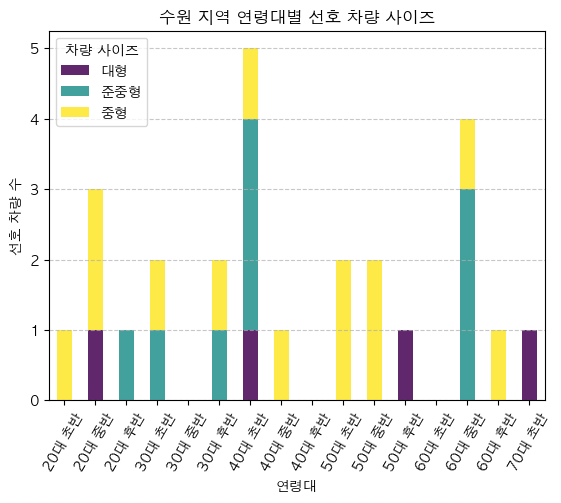

<Figure size 1000x500 with 0 Axes>

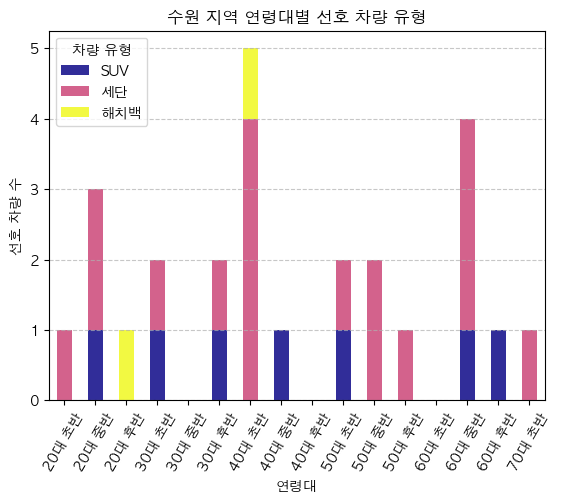

In [67]:
# 수원의 나이대에 따른 선호 차량 사이즈 및 유형
# 수원 지역만 추출
suwon = df.loc[df["거주 지역"] == "경기도 수원시", :]

# 연령대별 선호 차량 사이즈 및 유형 집계
size_counts = suwon.groupby("연령대")["차량 사이즈"].value_counts().unstack()
type_counts = suwon.groupby("연령대")["차량 유형"].value_counts().unstack()

# 시각화 - 연령대별 선호 차량 사이즈
plt.figure(figsize=(10, 5))
size_counts.plot(kind="bar", stacked=True, colormap="viridis", alpha=0.85)
plt.title("수원 지역 연령대별 선호 차량 사이즈")
plt.xlabel("연령대")
plt.ylabel("선호 차량 수")
plt.legend(title="차량 사이즈")
plt.xticks(rotation=60)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 시각화 - 연령대별 선호 차량 유형
plt.figure(figsize=(10, 5))
type_counts.plot(kind="bar", stacked=True, colormap="plasma", alpha=0.85)
plt.title("수원 지역 연령대별 선호 차량 유형")
plt.xlabel("연령대")
plt.ylabel("선호 차량 수")
plt.legend(title="차량 유형")
plt.xticks(rotation=60)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
# 수원 지역 판매 특징

# 1. 40대 초반과 60대 중반이 가장 많이 구매 : 주 타겟층
    # 선호 차량 유형 : 준중형 세단
# 2. 전반적으로 중형~준중형 사이즈 차량 수요 높음
    # 차종 역시 세단 선호도가 높음

# 결론 : 40대와 60대를 위한 패밀리카 마케팅이 필요, 세단의 장점 강조하는 마케팅

/var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/ipykernel_8079/2123113471.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_counts = ulsan.groupby("연령대")["차량 사이즈"].value_counts().unstack()
/var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/ipykernel_8079/2123113471.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  type_counts = ulsan.groupby("연령대")["차량 유형"].value_counts().unstack()


<Figure size 1000x500 with 0 Axes>

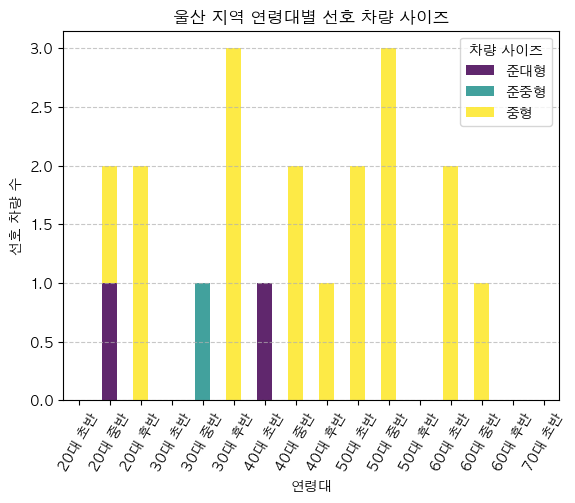

<Figure size 1000x500 with 0 Axes>

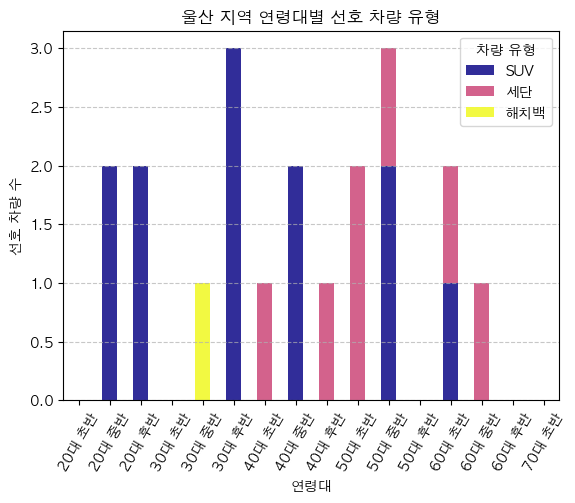

In [68]:
# 울산의 나이대에 따른 선호 차량 사이즈 및 유형
# 울산 지역만 추출
ulsan = df.loc[df["거주 지역"] == "울산광역시", :]

# 연령대별 선호 차량 사이즈 및 유형 집계
size_counts = ulsan.groupby("연령대")["차량 사이즈"].value_counts().unstack()
type_counts = ulsan.groupby("연령대")["차량 유형"].value_counts().unstack()

# 시각화 - 연령대별 선호 차량 사이즈
plt.figure(figsize=(10, 5))
size_counts.plot(kind="bar", stacked=True, colormap="viridis", alpha=0.85)
plt.title("울산 지역 연령대별 선호 차량 사이즈")
plt.xlabel("연령대")
plt.ylabel("선호 차량 수")
plt.legend(title="차량 사이즈")
plt.xticks(rotation=60)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 시각화 - 연령대별 선호 차량 유형
plt.figure(figsize=(10, 5))
type_counts.plot(kind="bar", stacked=True, colormap="plasma", alpha=0.85)
plt.title("울산 지역 연령대별 선호 차량 유형")
plt.xlabel("연령대")
plt.ylabel("선호 차량 수")
plt.legend(title="차량 유형")
plt.xticks(rotation=60)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
# 울산 지역 판매 특징

# 1. 30대 후반과 50대 중반 : 주 타겟층
    # 중형 SUV 선호
# 2. 비교적 전 연령대에서 고른 구매 수요를 보임
    # 중형 SUV 및 세단 선호도 높음
# 3. SUV의 선호도가 타지역에 비해 두드러짐
    # SUV 라인업 확대 필요

# 결론 : 30대와 50대를 위한 SUV 마케팅 필요, SUV 라인업 확대 필요

/var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/ipykernel_8079/837594308.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_counts = seongnam.groupby("연령대")["차량 사이즈"].value_counts().unstack()
/var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/ipykernel_8079/837594308.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  type_counts = seongnam.groupby("연령대")["차량 유형"].value_counts().unstack()


<Figure size 1000x500 with 0 Axes>

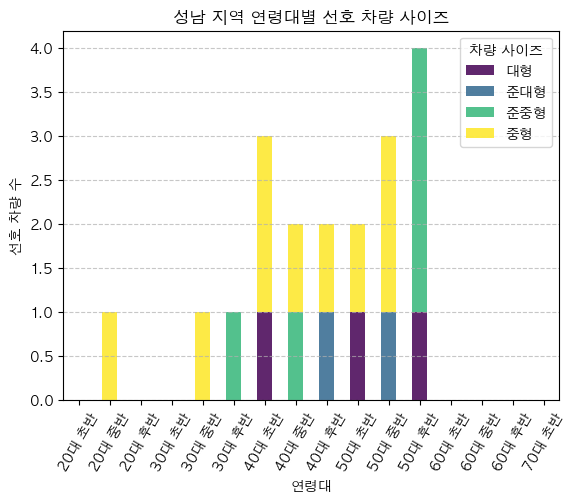

<Figure size 1000x500 with 0 Axes>

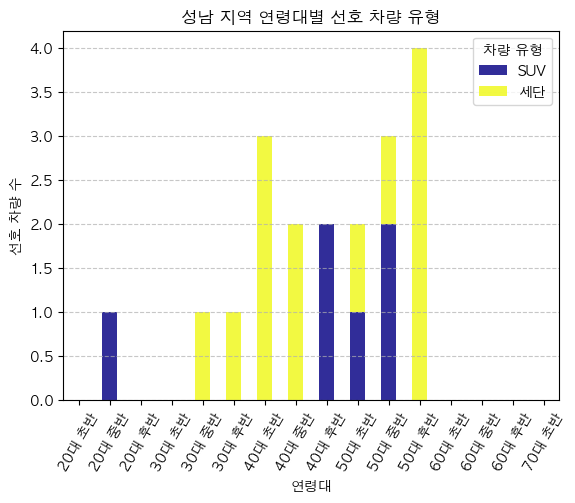

In [69]:
# 성남의 나이대에 따른 선호 차량 사이즈 및 유형
# 성남 지역만 추출
seongnam = df.loc[df["거주 지역"] == "경기도 성남시", :]

# 연령대별 선호 차량 사이즈 및 유형 집계
size_counts = seongnam.groupby("연령대")["차량 사이즈"].value_counts().unstack()
type_counts = seongnam.groupby("연령대")["차량 유형"].value_counts().unstack()

# 시각화 - 연령대별 선호 차량 사이즈
plt.figure(figsize=(10, 5))
size_counts.plot(kind="bar", stacked=True, colormap="viridis", alpha=0.85)
plt.title("성남 지역 연령대별 선호 차량 사이즈")
plt.xlabel("연령대")
plt.ylabel("선호 차량 수")
plt.legend(title="차량 사이즈")
plt.xticks(rotation=60)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 시각화 - 연령대별 선호 차량 유형
plt.figure(figsize=(10, 5))
type_counts.plot(kind="bar", stacked=True, colormap="plasma", alpha=0.85)
plt.title("성남 지역 연령대별 선호 차량 유형")
plt.xlabel("연령대")
plt.ylabel("선호 차량 수")
plt.legend(title="차량 유형")
plt.xticks(rotation=60)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
# 성남 지역 판매 특징

# 1. 40대 초반과 50대 중후반 : 주 타겟층
    # 중형 세단 선호
# 2. 40대 이상의 연령대에서 주된 구매 수요를 보임
    # 준중형/중형 세단 선호도 높음
# 3. 30대 이하의 연령대에서 차량 구매 수요가 낮은 편
    # 저가 전략 혹은 젊은 세대를 위한 마케팅 필요

# 결론 : 40대와 50대를 위해 친숙한 이미지 강조하는 마케팅 필요, 젊은 세대를 위한 저가 전략 마케팅 필요

/var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/ipykernel_8079/2104159280.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_counts = cheonan.groupby("연령대")["차량 사이즈"].value_counts().unstack()
/var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/ipykernel_8079/2104159280.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  type_counts = cheonan.groupby("연령대")["차량 유형"].value_counts().unstack()


<Figure size 1000x500 with 0 Axes>

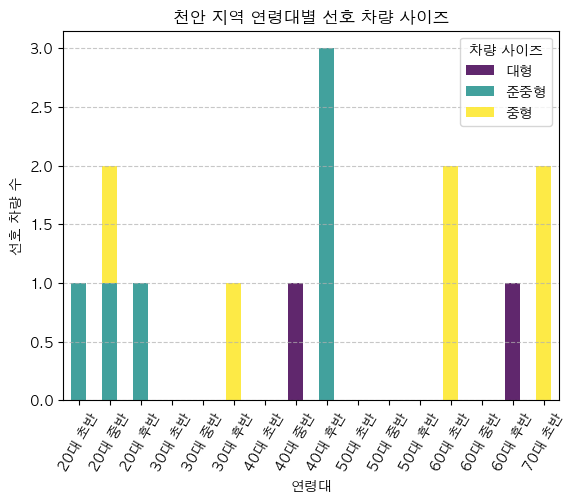

<Figure size 1000x500 with 0 Axes>

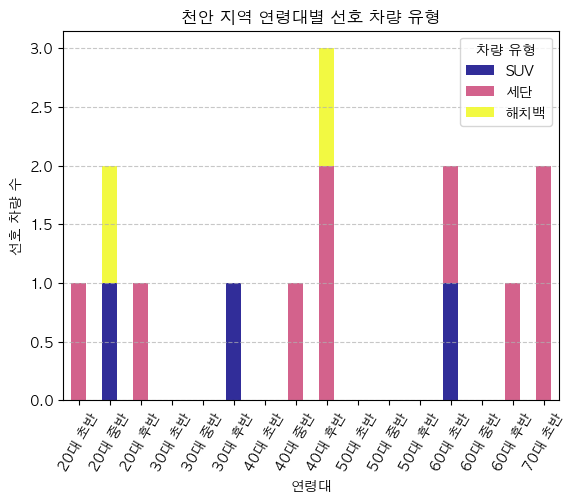

In [70]:
# 천안의 나이대에 따른 선호 차량 사이즈 및 유형
# 천안 지역만 추출
cheonan = df.loc[df["거주 지역"] == "충청남도 천안시", :]

# 연령대별 선호 차량 사이즈 및 유형 집계
size_counts = cheonan.groupby("연령대")["차량 사이즈"].value_counts().unstack()
type_counts = cheonan.groupby("연령대")["차량 유형"].value_counts().unstack()

# 시각화 - 연령대별 선호 차량 사이즈
plt.figure(figsize=(10, 5))
size_counts.plot(kind="bar", stacked=True, colormap="viridis", alpha=0.85)
plt.title("천안 지역 연령대별 선호 차량 사이즈")
plt.xlabel("연령대")
plt.ylabel("선호 차량 수")
plt.legend(title="차량 사이즈")
plt.xticks(rotation=60)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 시각화 - 연령대별 선호 차량 유형
plt.figure(figsize=(10, 5))
type_counts.plot(kind="bar", stacked=True, colormap="plasma", alpha=0.85)
plt.title("천안 지역 연령대별 선호 차량 유형")
plt.xlabel("연령대")
plt.ylabel("선호 차량 수")
plt.legend(title="차량 유형")
plt.xticks(rotation=60)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
# 천안 지역 판매 특징

# 1. 40대 후반 : 주 타겟층
    # 준중형 세단/해치백 선호
# 2. 전반적인 수요가 높지 않음
    # 사람들의 차량 구매를 유도할 수 있는 마케팅 필요

# 결론 : 차량 구매 유도를 위한 저가/할인 마케팅 전략 필요, 디자인/성능 등에서 사람들의 이목을 끌 수 있는 마케팅 필요

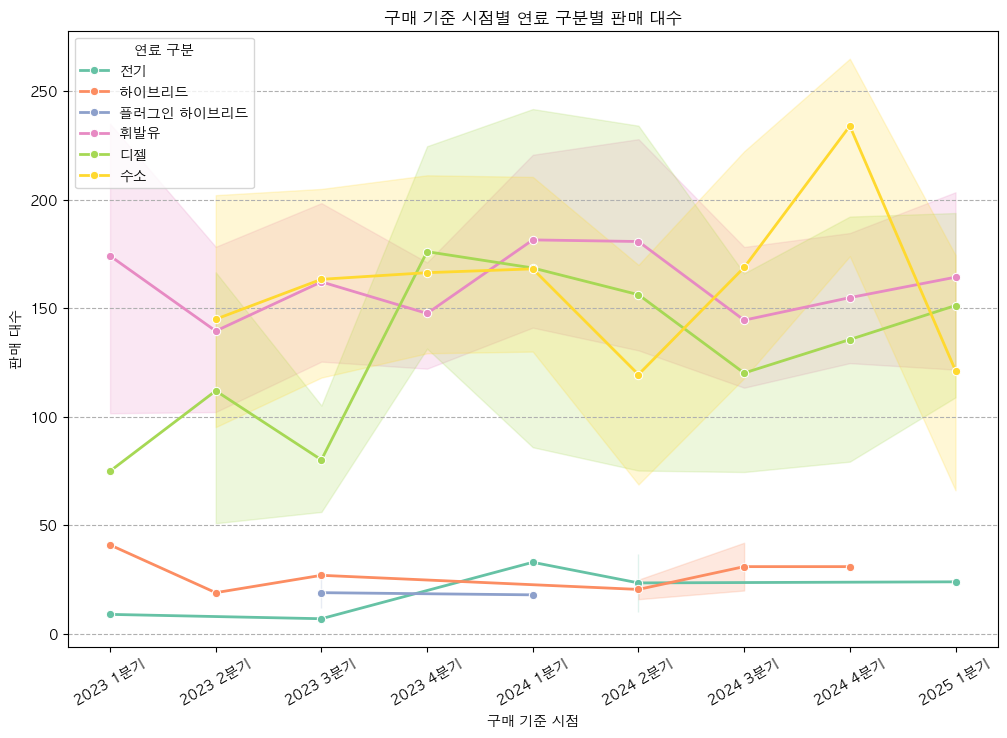

In [10]:
df["구매 기준 시점"] = df["최근 구매 날짜"].str.split("-").str.get(0) + " " + df["최근 구매 시점"]
date_order = ["2023 1분기", "2023 2분기", "2023 3분기", "2023 4분기", "2024 1분기", "2024 2분기", "2024 3분기", "2024 4분기", "2025 1분기"]

df["구매 기준 시점"] = pd.Categorical(df["구매 기준 시점"], categories=date_order, ordered=True)

# 구매 기준 시점별 각 연료 구분의 개수 시각화
# 각 연료 구분 별로 선으로 연결
# 라인 뒤 색칠 없이 선만 표시
plt.figure(figsize=(12, 8))
sb.lineplot(x="구매 기준 시점", y="연번", hue="연료 구분", data=df, marker="o", palette="Set2", lw=2)
plt.title("구매 기준 시점별 연료 구분별 판매 대수")
plt.xlabel("구매 기준 시점")
plt.ylabel("판매 대수")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--")
plt.legend(title="연료 구분", loc="upper left")
plt.show()

In [11]:
# 수소차 폭발 2024년 4분기에 잇따라... (https://biz.sbs.co.kr/article/20000208890?division=NAVER)
# 수소차 판매량 2025년 1분기 기점으로 하락세



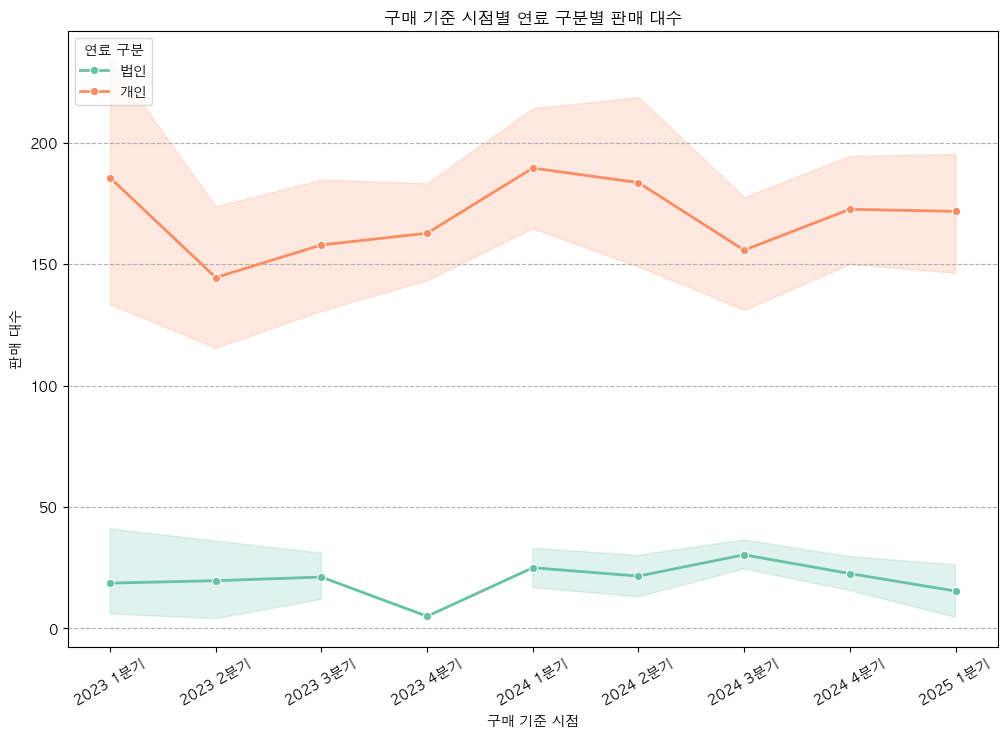

In [12]:
# 구매 기준 시점별 각 연료 구분의 개수 시각화
# 각 연료 구분 별로 선으로 연결
# 라인 뒤 색칠 없이 선만 표시
plt.figure(figsize=(12, 8))
sb.lineplot(x="구매 기준 시점", y="연번", hue="고객 구분", data=df, marker="o", palette="Set2", lw=2)
plt.title("구매 기준 시점별 연료 구분별 판매 대수")
plt.xlabel("구매 기준 시점")
plt.ylabel("판매 대수")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--")
plt.legend(title="연료 구분", loc="upper left")
plt.show()

In [13]:
# 2023년 비트코인 가격 상승으로 인해 반도체 부족 현상 발생 (https://www.spglobal.com/mobility/en/info/kr/featured-headlines.html)
# 반도체 부족 현상으로 인해 차량 생산량 감소

# 2024년 2분기 이후도 비트코인 이슈로 인한 반도체 부족 현상 발생

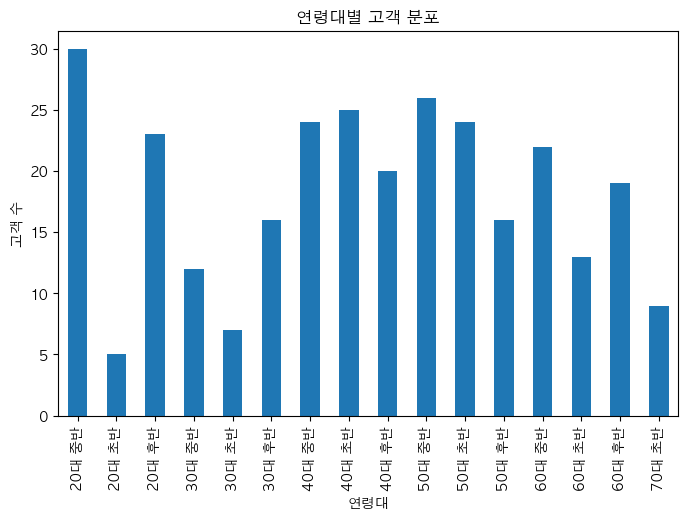

In [14]:
plt.figure(figsize=(8, 5))
df['연령대'].value_counts().sort_index().plot(kind='bar')
plt.title("연령대별 고객 분포")
plt.xlabel("연령대")
plt.ylabel("고객 수")
plt.show()

In [15]:
# 40대 진입 이후 차량 구매 수요 증가하는 것으로 파악
# 잠재적 마케팅 대상을 30대 후반~40대 초반으로 설정

In [16]:
df

,연번,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,아이디,...,최근 구매 요일,마지막 구매 이후 경과 기간,최근 구매 당시 나이,최근 거래 금액,선호 거래 방식,선호 구매 경로,차량 구매 횟수,신차 구매 지수,브랜드 충성도 지수,구매 기준 시점
0,1,강주온,2002-03-04,23,20대 중반,남,010-6502-8753,janisi@himedia.co.kr,법인,14798,...,평일,350,22,33820000,신용카드,오프라인,1,0.002,0.135,2024 2분기
1,2,김경수,1983-01-02,42,40대 초반,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,kyoungsoo031,...,평일,38,42,89930000,신용카드,오프라인,5,0.508,0.037,2025 1분기
2,3,김다은,1999-05-02,26,20대 중반,여,010-6789-0123,kimdaeun26@himedia.co.kr,법인,daeun026,...,평일,10,26,70990000,계좌이체,오프라인,1,0.161,0.004,2025 1분기
3,4,김민수,1960-07-01,65,60대 중반,남,010-1234-5678,kimminsu1@himedia.co.kr,법인,minsu001,...,평일,689,63,50970000,현금,오프라인,1,0.002,0.130,2023 2분기
4,5,김승현,1970-03-02,55,50대 중반,남,010-0123-4567,kimseunghyun20@himedia.co.kr,법인,seunghyun020,...,주말,536,53,49890000,신용카드,오프라인,1,0.004,0.103,2023 4분기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,288,신시우,1958-07-11,67,60대 후반,여,042-207-6955,gyeonghyi78@gmail.com,개인,jihungim,...,평일,90,66,84310000,신용카드,온라인,2,0.011,0.280,2024 4분기
287,289,최춘자,1976-06-27,49,40대 후반,여,031-170-7739,hancunja@yu.kr,개인,jinho50,...,평일,574,47,35670000,현금,오프라인,3,0.047,0.116,2023 3분기
288,290,차서준,1968-01-22,57,50대 후반,여,064-741-3740,qgim@simryujo.com,개인,jihun41,...,평일,433,56,70990000,계좌이체,온라인,2,0.005,0.304,2024 1분기
289,291,안정희,1984-01-10,41,40대 초반,남,051-406-1803,donghyeonbae@joyunson.com,개인,yeongil47,...,평일,415,40,86540000,현금,온라인,2,0.006,0.268,2024 1분기


/var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/ipykernel_96204/3755540459.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x="연령대", y="차량 구매 횟수", data=df, palette="Set2")


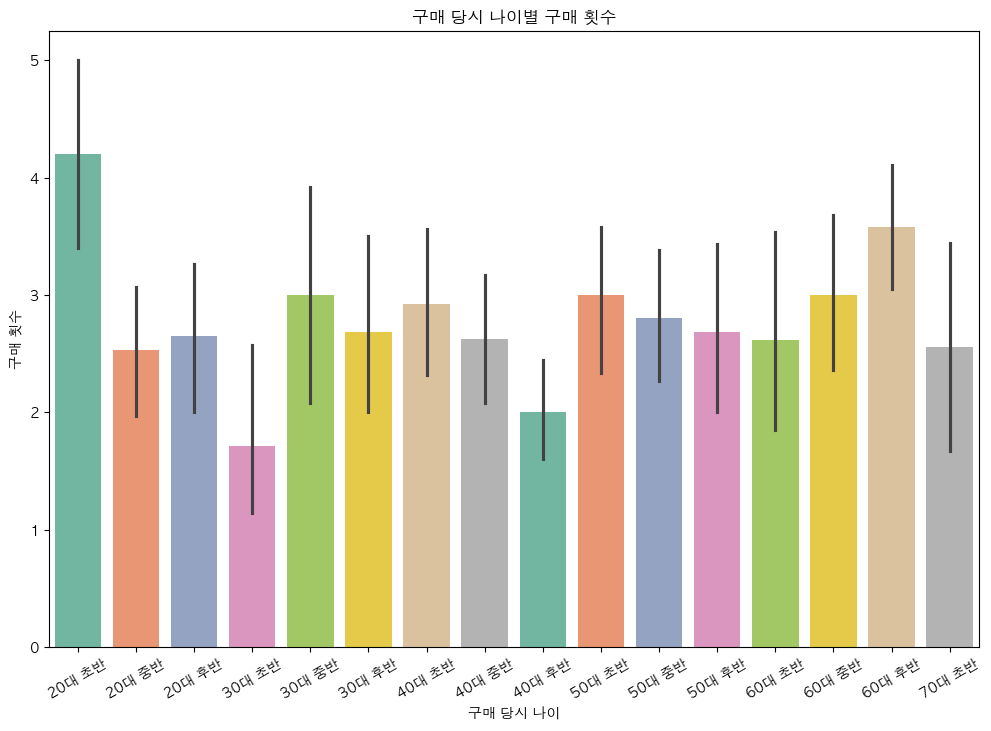

In [24]:
# 구매 당시 나이별 구매 횟수를 시각화하기
# 바 플롯으로
plt.figure(figsize=(12, 8))
sb.barplot(x="연령대", y="차량 구매 횟수", data=df, palette="Set2")
plt.title("구매 당시 나이별 구매 횟수")
plt.xlabel("구매 당시 나이")
plt.ylabel("구매 횟수")
plt.xticks(rotation=30)
plt.show()

In [18]:
# 잠재적인 고객층 분석 : 약 15년 주기로 차량을 교체하는 양상

# 20대 초반에 구매 횟수가 가장 많음
# 30대 중반에도 구매 횟수가 높은 편
# 50대 초반에도 구매 횟수가 증가하는 경향성
# 60대 후반에 구매 횟수 대폭 상승
    # 회장님 나이대의 차량 구매라고 볼 수 있음

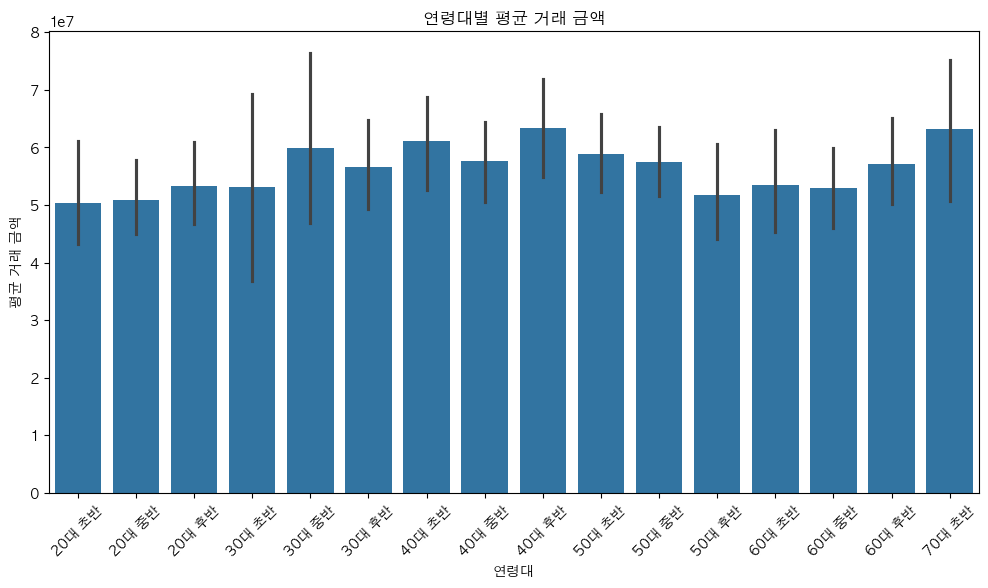

In [26]:
plt.figure(figsize=(12, 6))
sb.barplot(data=df, x="연령대", y="최근 거래 금액")
plt.xlabel("연령대")
plt.ylabel("평균 거래 금액")
plt.title("연령대별 평균 거래 금액")
plt.xticks(rotation=45)
plt.show()

In [20]:
# 30대 중반에 구매 금액이 가장 높음

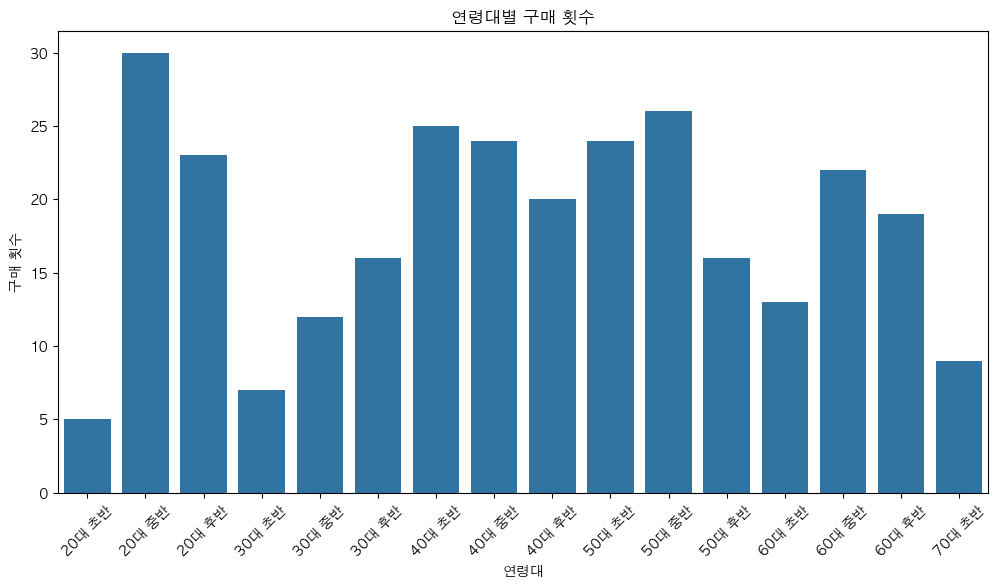

In [25]:
plt.figure(figsize=(12, 6))
sb.countplot(data=df, x="연령대", order=age_order)
plt.xlabel("연령대")
plt.ylabel("구매 횟수")
plt.xticks(rotation=45)
plt.title("연령대별 구매 횟수")
plt.show()